# Clustering Crypto

In [27]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [75]:
# Load the crypto_data.csv dataset.
file_to_load = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_to_load)
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [29]:
crypto_df.dtypes


Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [33]:
crypto_df.shape

(1144, 7)

In [34]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df["IsTrading"] == True]
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [32]:
crypto_df.shape

(1144, 7)

In [35]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df[crypto_df["Algorithm"] != "N/A"]

In [36]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(['IsTrading'], axis='columns')
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [37]:
# Remove rows that have at least 1 null value.
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [39]:
crypto_df = crypto_df.dropna(axis = 0, how='any')
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [40]:
crypto_df.shape

(685, 6)

In [41]:
# Keep the rows where coins are mined.
crypto_df.set_index('Unnamed: 0', inplace=True)
crypto_df.index.name = None

In [44]:
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined']> 0]
print(crypto_df.shape)
crypto_df.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [45]:
# Create a new DataFrame that holds only the cryptocurrencies names.
cryptoName_df = pd.DataFrame(crypto_df ['CoinName'])
cryptoName_df.head(10)

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic
ZEC,ZCash


In [46]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis='columns')
crypto_df.head(10)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [47]:
# Use get_dummies() to create variables for text features.
cryptoFeatures_df = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
cryptoFeatures_df.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Standardize the data with StandardScaler().
cryptoFeatures_scaled = StandardScaler().fit_transform(cryptoFeatures_df)
print(cryptoFeatures_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [49]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(cryptoFeatures_scaled)
print(crypto_pca)

[[-0.33760155  1.03657089 -0.59432199]
 [-0.320944    1.03673963 -0.59470408]
 [ 2.31046206  1.60320008 -0.69188885]
 ...
 [ 0.32852349 -2.30850465  0.42971999]
 [-0.17159799 -1.96556892  0.39014978]
 [-0.29148665  0.80698714 -0.27809506]]


In [50]:
# Create a DataFrame with the three principal components.
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=cryptoName_df.index
)
crypto_pca_df.head(10)



,PC1,PC2,PC3
42,-0.337602,1.036571,-0.594322
404,-0.320944,1.036740,-0.594704
1337,2.310462,1.603200,-0.691889
BTC,-0.142855,-1.343971,0.238234
ETH,-0.128823,-2.086409,0.549952
LTC,-0.168650,-1.112094,-0.010222
DASH,-0.394054,1.239759,-0.488111
XMR,-0.146607,-2.254797,0.436799
ETC,-0.127265,-2.086504,0.549932
ZEC,-0.171597,-1.965569,0.390150


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [51]:
# Create an elbow curve to find the best value for K.
inertia = []

k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
# Plot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x = "k", y = "inertia", title = "Elbow Curve", xticks = k)

C:\Users\leona\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [52]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=5)
model

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)
print(predictions)

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 2 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 2 2 1 1 1 0 2 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 2 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [54]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, crypto_pca_df], axis=1, join="inner")

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.merge(clustered_df, cryptoName_df, left_index=True, right_index=True)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.337602,1.036571,-0.594322,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320944,1.036740,-0.594704,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.310462,1.603200,-0.691889,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.142855,-1.343971,0.238234,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.128823,-2.086409,0.549952,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.168650,-1.112094,-0.010222,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.394054,1.239759,-0.488111,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.146607,-2.254797,0.436799,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.127265,-2.086504,0.549932,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.171597,-1.965569,0.390150,ZCash,1


In [55]:
clustered_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
PC1                float64
PC2                float64
PC3                float64
CoinName            object
Class                int32
dtype: object

### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [57]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Class",
    symbol="Class",
    width=800,
    hover_data={'CoinName': True, 
                'Algorithm': True
               })
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [58]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [60]:
# Print the total number of tradable cryptocurrencies.
clustered_df.shape[0]


532

In [65]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaling_df = pd.DataFrame(clustered_df, columns=['TotalCoinSupply', 'TotalCoinsMined'])
crypto_scaled = StandardScaler().fit_transform(scaling_df)
crypto_scaled

array([[-0.1528703 , -0.11710817],
       [-0.145009  , -0.09396955],
       [ 4.48942416,  0.52494561],
       ...,
       [-0.13217937, -0.09561336],
       [-0.15255998, -0.11694817],
       [-0.15285552, -0.11710536]])

In [67]:
plot_df = pd.DataFrame(data=crypto_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)
plot_df.head()

,TotalCoinSupply,TotalCoinsMined
42,-0.152870,-0.117108
404,-0.145009,-0.093970
1337,4.489424,0.524946
BTC,-0.152560,-0.116715
ETH,-0.152870,-0.114747


In [68]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data=crypto_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName" ] = clustered_df["CoinName" ]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class" ] = clustered_df["Class" ]

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,-0.152870,-0.117108,42 Coin,0
404,-0.145009,-0.093970,404Coin,0
1337,4.489424,0.524946,EliteCoin,0
BTC,-0.152560,-0.116715,Bitcoin,1
ETH,-0.152870,-0.114747,Ethereum,1
LTC,-0.151629,-0.115726,Litecoin,1
DASH,-0.152545,-0.116910,Dash,0
XMR,-0.152870,-0.116731,Monero,1
ETC,-0.149767,-0.114622,Ethereum Classic,1
ZEC,-0.152560,-0.116946,ZCash,1


In [76]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols=["CoinName", "TotalCoinsMined", "TotalCoinSupply"])


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)

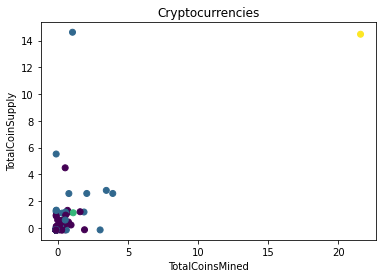

In [77]:
import matplotlib.pyplot as plt
plt.scatter(x=plot_df["TotalCoinsMined"], y=plot_df["TotalCoinSupply"], c=plot_df["Class"])
plt.xlabel("TotalCoinsMined")
plt.ylabel("TotalCoinSupply")
plt.title('Cryptocurrencies')
plt.show()